In [1]:
!pip install --no-cache-dir "numpy==1.26.4"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 180.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [2]:
!pip install --force-reinstall --no-cache-dir gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 232.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 233.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 150.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 169.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 162.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successful

In [3]:
import pandas as pd
import numpy as np
import joblib
from tqdm.notebook import tqdm
import pickle
import string
import random
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.spatial.distance import cosine

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preparation des données d'entraînement



In [ ]:
list_sentences_D2V = joblib.load('/content/drive/MyDrive/TALL/pickled_lists/TOKENS_SENTENCES_chapitres.pkl')

In [ ]:
list_sentences_D2V[199]

2896

In [ ]:
list_words_W2V = [sentence.split() for sublist in list_sentences_D2V for sentence in sublist]

In [ ]:
list_words_W2V[0][10]

'sur'

In [ ]:
list_sentences_D2V[0][0]

'faut vous dire que chez fifi la clientèle est triée sur le volet'

In [ ]:
flattened_sentences = [sentence for sublist in list_sentences_D2V for sentence in sublist]

In [ ]:
flattened_sentences[0]

'faut vous dire que chez fifi la clientèle est triée sur le volet'

In [ ]:
tagged_data = [
    TaggedDocument(words=sentence.lower().split(), tags=[f'DOC_{i}'])
    for i, sentence in enumerate(flattened_sentences)
]

NameError: name 'TaggedDocument' is not defined

# Entraînement des modèles joints

In [ ]:
word2vec_model = Word2Vec(list_words_W2V, vector_size=50, window=5, min_count=5, negative=5, epochs=10, workers=4)

In [ ]:
print(word2vec_model.wv.index_to_key)

['de', 'le', 'la', 'et', 'les', 'à', 'il', 'un', 'l’', 'que', 'en', 'je', 'd’', 'une', 'qui', 'pas', 'est', 'ne', 'dans', 'elle', 'à', 'qu’', 'vous', 'se', 'ce', 'pour', 'son', 'était', 's’', 'n’', 'des', 'a', 'avait', 'plus', 'lui', 'sur', 'sa', 'mais', 'avec', 'par', 'me', 'on', 'tout', 'comme', 'nous', 'c’', 'ses', 'si', 'j’', 'dit', 'cette', 'bien', 'y', 'mon', 'ai', "l'", 'sans', 'm’', 'ils', 'ou', 'ces', 'tu', "d'", 'moi', 'ma', 'fait', 'où', 'même', 'leur', 'faire', 'encore', 'quand', 'être', 'peu', 'rien', '-il', 'homme', "qu'", 'autre', 'aussi', 'tous', 'cela', 'dont', 'puis', 'suis', 'été', 'votre', 'temps', 'non', 'sont', 'après', 'étaient', 'yeux', 'jamais', 'femme', 'avoir', 'sous', 'm.', 'mes', 'fois', "n'", 'donc', '-vous', 'alors', 'toujours', "s'", 'jeune', 'leurs', 'dire', 'fut', 'toute', 'père', 'vers', 'vie', 'quelques', 'jour', 'là', 'monsieur', 'car', '-ce', 'tête', 'main', 'moins', 'fit', 'chez', 'quelque', 'fille', 'très', 'oui', 'voir', 'point', 'v

In [ ]:
doc2vec_model = Doc2Vec(vector_size=50, window=5, min_count=5, epochs=10, dm=1, workers=4)
doc2vec_model.build_vocab(tagged_data)

In [ ]:
doc2vec_model.wv.vectors = word2vec_model.wv.vectors
doc2vec_model.wv.index_to_key = word2vec_model.wv.index_to_key

In [ ]:
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

In [ ]:
doc2vec_model = Doc2Vec.load("/content/drive/MyDrive/TALL/models/D2V_model.model")

In [ ]:
tagged_data[0]

TaggedDocument(words=['faut', 'vous', 'dire', 'que', 'chez', 'fifi', 'la', 'clientèle', 'est', 'triée', 'sur', 'le', 'volet'], tags=['DOC_0'])

In [ ]:
word_vector = word2vec_model.wv["clientèle"]  # Word vector for "mademoiselle"
doc_vector = doc2vec_model.dv["DOC_0"]   # Document vector for first document

# Cosine similarity between word and document vectors
similarity = word2vec_model.wv.cosine_similarities(word_vector, [doc_vector])
print(f"Cosine similarity between 'mademoiselle' and DOC_0: {similarity[0]}")


Cosine similarity between 'mademoiselle' and DOC_0: -0.0999322310090065


In [ ]:
word2vec_model.save("/content/drive/MyDrive/TALL/models/W2V_model.model")
doc2vec_model.save("/content/drive/MyDrive/TALL/models/D2V_model.model")

In [ ]:
word2vec_model.wv.most_similar(positive=['chat'],topn=10)

[('chien', 0.8645654320716858),
 ('serpent', 0.8555624485015869),
 ('sanglier', 0.850757360458374),
 ('singe', 0.8323524594306946),
 ('loup', 0.8243848085403442),
 ('veau', 0.8177970051765442),
 ('ver', 0.8039928674697876),
 ('poisson', 0.7873258590698242),
 ('bœuf', 0.7870402932167053),
 ('lion', 0.7851420044898987)]

In [ ]:
word2vec_model.wv.most_similar(positive=['chat', 'chien'], negative=['dragon'],topn=10)

[('loup', 0.6842248439788818),
 ('bébé', 0.6826199293136597),
 ('veau', 0.6683413982391357),
 ('tigre', 0.6479686498641968),
 ('singe', 0.6476970314979553),
 ('merle', 0.6470012664794922),
 ('lion', 0.6459525227546692),
 ('sanglier', 0.6356836557388306),
 ('serpent', 0.63323974609375),
 ('lièvre', 0.6117339134216309)]

In [ ]:
len(word2vec_model.wv["amour"])

50

# Visualisation

In [ ]:
stops = open("/content/drive/MyDrive/TALL/txt/stopwords.txt", encoding="utf-8").read().split("\n")

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px

In [ ]:
words = [word for word in word2vec_model.wv.index_to_key if word not in stops and word not in string.punctuation][:500]
word_vectors = np.array([word2vec_model.wv[word] for word in words])

tsne = TSNE(n_components=3, perplexity=30, learning_rate=200,random_state=0)
vectors_3d = tsne.fit_transform(word_vectors)

import pandas as pd
df = pd.DataFrame(vectors_3d, columns=['x', 'y', 'z'])
df['word'] = words

fig = px.scatter_3d(df, x='x', y='y', z='z', text='word', title="Visualisation 3D des Vecteurs Word2Vec")
fig.show()

In [ ]:
fig.write_html("/content/drive/MyDrive/TALL/word2vec_visualization.html")

# Inférence de doc2vec sur nos deux textes

In [ ]:
def read_and_chunk_text(path_to_txt, chunk_size=512, overlap=256):
    with open(path_to_txt, 'r', encoding='utf-8') as f:
        text = f.read()

    # Tokenize the text by splitting on whitespace
    tokens = text.split()

    # Create rolling chunks
    chunks = []
    for i in range(0, len(tokens), chunk_size - overlap):
        chunk = tokens[i:i + chunk_size]
        if len(chunk) == chunk_size:
            chunks.append(chunk)

    return chunks

In [ ]:
def infer_vectors_from_chunks(path_to_txt, model, chunk_size=512, overlap=256):
    # Get rolling chunks from the text
    chunks = read_and_chunk_text(path_to_txt, chunk_size, overlap)

    # Infer vector for each chunk
    vectors = []
    for chunk in tqdm(chunks, desc="Inferring vectors"):
        inferred_vector = model.infer_vector(chunk)
        vectors.append(inferred_vector)

    return vectors, chunks

In [ ]:
vecteurs_D2V, chunks = infer_vectors_from_chunks("/content/drive/MyDrive/TALL/txt/1869_Flaubert-Gustave_L-Education-sentimentale.txt", doc2vec_model)

Inferring vectors:   0%|          | 0/608 [00:00<?, ?it/s]

In [ ]:
" ".join(chunks[514])

':– Madame, c’est M. Moreau !Elle se leva plus pâle que sa collerette. Elle tremblait.– Qui me vaut l’honneur... d’une visite... aussi imprévue ?– Rien ! Le plaisir de revoir d’anciens amis !Et, tout en s’asseyant :– Comment va ce bon Arnoux ?– Parfaitement ! Il est sorti.– Ah ! je comprends ! toujours ses vieilles habitudes du soir ; un peu de distraction !– Pourquoi pas ? Après une journée de calculs, la tête a besoin de se reposer !Elle vanta même son mari, comme travailleur. Cet éloge irritait Frédéric ; et, désignant sur ses genoux un morceau de drap noir, avec des soutaches bleues :– Qu’est-ce que vous faites là ?– Une veste que j’arrange pour ma fille.– À propos, je ne l’aperçois pas, où est-elle donc ?– Dans une pension, reprit Mme Arnoux.Des larmes lui vinrent aux yeux ; elle les retenait, en poussant son aiguille rapidement. Il avait pris par contenance un numéro de l’Illustration, sur la table, près d’elle.– Ces caricatures de Cham sont très drôles, n’est-ce pas ?– Oui.Puis 

In [ ]:
" ".join(chunks[515])

'assure que vous m’avez fait bien souffrir !Elle reprit, avec une sorte de lamentation dans la voix :– Mais j’avais peur pour mon enfant !Elle lui conta la maladie du petit Eugène et toutes les angoisses de cette journée.– Merci ! merci ! Je ne doute plus ! je vous aime comme toujours !– Eh non ! ce n’est pas vrai !– Pourquoi ?Elle le regarda froidement.– Vous oubliez l’autre ! Celle que vous promenez aux courses ! La femme dont vous avez le portrait, votre maîtresse !– Eh bien, oui ! s’écria Frédéric. Je ne nie rien. Je suis un misérable ! écoutez-moi !S’il l’avait eue, c’était par désespoir, comme on se suicide. Du reste, il l’avait rendue fort malheureuse, pour se venger sur elle de sa propre honte.– Quel supplice ! Vous ne comprenez pas ?Mme Arnoux tourna son beau visage, en lui tendant la main ; et ils fermèrent les yeux, absorbés dans une ivresse qui était comme un bercement doux et infini. Puis ils restèrent à se contempler, face à face, l’un près de l’autre.– Est-ce que vous po

In [ ]:
vecteurs_D2V[0]

array([-0.7130484 ,  0.28243202, -0.58843166, -0.34020656, -0.24365324,
       -0.16212396,  0.19642015, -0.6399392 ,  0.05239695, -0.7257778 ,
       -0.22118914, -0.69381964, -0.0919093 ,  0.11944132,  1.0429924 ,
        0.569013  , -0.25000113,  0.17405254,  0.56544596,  0.39044476,
       -0.46428847,  0.23541047, -0.85637987,  0.34788248, -0.4460853 ,
       -0.01687171, -0.2549959 ,  0.643363  ,  0.21531634, -0.865224  ,
        0.2952296 , -0.5738827 , -0.5222291 , -0.47111025,  0.1840434 ,
       -0.12349356, -0.40819833, -0.3916599 ,  0.4340963 ,  0.09082308,
        0.74479425,  0.9289033 ,  0.34226528, -0.53688085,  0.13618323,
        0.2309285 ,  0.34902757, -0.5792471 ,  0.19337748,  0.8788842 ],
      dtype=float32)

In [ ]:
# Replace with your inferred Doc2Vec vectors and labels
doc_vectors = np.array(vecteurs_D2V)  # Already inferred vectors for documents
doc_labels = [f"chunk_{i}" for i in range(len(doc_vectors))]

# Using t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, perplexity=30, learning_rate=200, random_state=0)
doc_vectors_3d = tsne.fit_transform(doc_vectors)

# Create a DataFrame for visualization
df_docs = pd.DataFrame(doc_vectors_3d, columns=['x', 'y', 'z'])
df_docs['label'] = doc_labels  # Assign document labels

# Plotting the 3D scatter plot for Doc2Vec vectors
fig = px.scatter_3d(df_docs, x='x', y='y', z='z', text='label', title="3D Visualization of Doc2Vec Vectors")
fig.show()


In [ ]:
fig.write_html("/content/drive/MyDrive/TALL/doc2vec_visualization.html")

In [ ]:
def get_most_similar_chunk(model, vectors, target_words):
    # Infer the word vectors for target words and average them
    word_vectors = [model.wv[word] for word in target_words if word in model.wv]
    target_vector = np.mean(word_vectors, axis=0)

    # Calculate cosine similarity for each chunk vector and find the most similar one
    similarities = [1 - cosine(target_vector, vector) for vector in vectors]
    most_similar_idx = np.argmax(similarities)

    return most_similar_idx, similarities[most_similar_idx], similarities


In [ ]:
target_words = ['amour']
most_similar_idx, similarity_score, similarity_courante_amour = get_most_similar_chunk(word2vec_model, vecteurs_D2V, target_words)

print(f"Most similar chunk index: {most_similar_idx}")
print(f"Cosine similarity score: {similarity_score}")


Most similar chunk index: 51
Cosine similarity score: 0.43574383673326866


In [ ]:
' '.join(chunks[most_similar_idx])

'Elle tombera, cette royauté, soyez-en sûrs ; elle tombera, non dans le sang, comme celle de 89, mais elle tombera dans son piège Et après avoir eu les révolutions de la liberté et les contre-révolutions de la gloire, vous aurez la révolution de la conscience publique et la révolution du mépris. »À Châlons, un toast fut porté à la Convention.D’autres banquets eurent lieu à Colmar, Pontoise, Reims, Strasbourg, Dijon, etc. ; le PiémontAu début de l’année 1848, le Piémont était très agité, comme toute l’Italie. Le 30 octobre 1847, le roi Charles-Albert, cédant à la pression de son peuple, avait congédié son ministre réactionnaire et annoncé plusieurs réformes libérales : élection des administrateurs locaux, égalité des classes dans les conseils des villes, abolition des tribunaux d’exception, etc., NaplesLe roi Ferdinand II de Naples avait été obligé d’accorder, le 24 janvier 1848, une constitution calquée sur la charte française de 1830. Le fait était d’autant plus significatif que le ro

In [ ]:
target_words = ['guerre']
most_similar_idx, similarity_score, similarity_courante_guerre = get_most_similar_chunk(word2vec_model, vecteurs_D2V, target_words)

print(f"Most similar chunk index: {most_similar_idx}")
print(f"Cosine similarity score: {similarity_score}")


Most similar chunk index: 369
Cosine similarity score: 0.3577403467636042


In [ ]:
' '.join(chunks[most_similar_idx])

'Elle tombera, cette royauté, soyez-en sûrs ; elle tombera, non dans le sang, comme celle de 89, mais elle tombera dans son piège Et après avoir eu les révolutions de la liberté et les contre-révolutions de la gloire, vous aurez la révolution de la conscience publique et la révolution du mépris. »À Châlons, un toast fut porté à la Convention.D’autres banquets eurent lieu à Colmar, Pontoise, Reims, Strasbourg, Dijon, etc. ; le PiémontAu début de l’année 1848, le Piémont était très agité, comme toute l’Italie. Le 30 octobre 1847, le roi Charles-Albert, cédant à la pression de son peuple, avait congédié son ministre réactionnaire et annoncé plusieurs réformes libérales : élection des administrateurs locaux, égalité des classes dans les conseils des villes, abolition des tribunaux d’exception, etc., NaplesLe roi Ferdinand II de Naples avait été obligé d’accorder, le 24 janvier 1848, une constitution calquée sur la charte française de 1830. Le fait était d’autant plus significatif que le ro

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

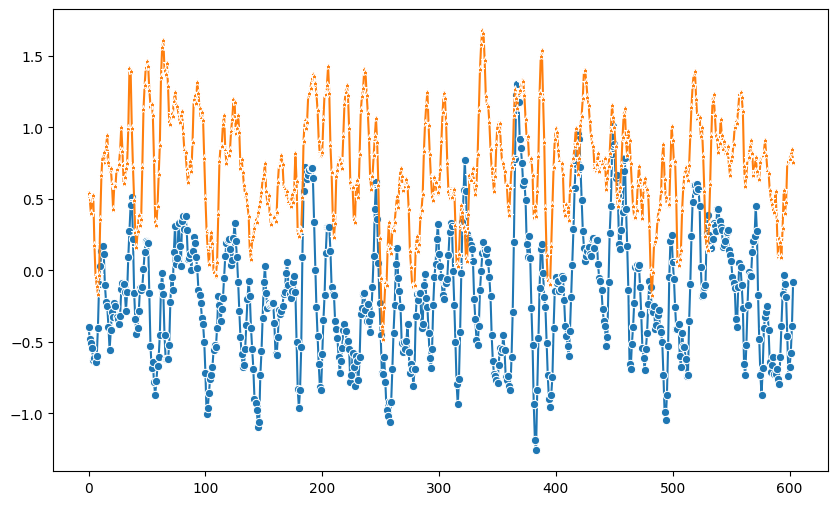

In [ ]:
# Plotting the similarity measures
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(len(rolling_sum_guerre)), y=rolling_sum_guerre, marker="o")
sns.lineplot(x=range(len(rolling_sum_amour)), y=rolling_sum_amour, marker="*")
plt.show()

In [ ]:
window_size = 5
rolling_sum_amour = np.convolve(similarity_courante_amour, np.ones(window_size), 'valid')

In [ ]:
rolling_sum

array([ 0.54314638,  0.49849124,  0.39869231,  0.51251583,  0.52973089,
        0.17996928, -0.04546872, -0.10638361, -0.16533292, -0.02868867,
        0.3616439 ,  0.66533753,  0.81601212,  0.82611976,  0.75857324,
        0.87353548,  0.94878242,  0.75667469,  0.69937588,  0.7149135 ,
        0.60731506,  0.42849332,  0.591258  ,  0.58859557,  0.71285591,
        0.73914026,  0.74395091,  0.84228824,  1.00637838,  0.83885943,
        0.61175077,  0.65290331,  0.71787768,  0.74937596,  0.9942636 ,
        1.41471813,  1.39741705,  0.99772257,  0.7225869 ,  0.49157119,
        0.27045408,  0.16477169,  0.27375455,  0.38764656,  0.31838848,
        0.36013094,  0.72508945,  1.12892102,  1.29515946,  1.4260388 ,
        1.46355435,  1.42958353,  1.26162098,  1.14979457,  1.16551534,
        1.08789325,  0.7754801 ,  0.3460258 ,  0.31840447,  0.45206557,
        0.67317035,  0.87869442,  1.35619508,  1.56429969,  1.61159212,
        1.40103476,  1.37600839,  1.45220836,  1.28862334,  1.04